In [3]:
## Step 1: Store 1 year of data for every necessary tag

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
from ecotools.pi_client import pi_client
import requests
import seaborn as sns 
from sklearn.cluster import KMeans
import os
os.chdir(r"/Users/danielsoriano/Desktop/ds/kBtu Baselines")

import warnings
warnings.filterwarnings('ignore')
#print(mnv.version)  # Last updated for mnv v2.0.1
from dateutil.relativedelta import relativedelta
from matplotlib import style
style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split 
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.metrics import r2_score
import math
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor
#import auto_run_ele_tag
import logging
import ecotools.auto

In [4]:
import pandas as pd
import numpy as np
from ecotools.pi_client import pi_client
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')
pc = pi_client(username= r'dbsorian')

def main():
    from datetime import datetime, timedelta
    #pred_start = pd.to_datetime(datetime.now().strftime('%Y-%m-%d %H:00:00')) - timedelta(days=1)
    #pred_end = datetime.now().strftime('%Y-%m-%d %H:00:00')
    pc = pi_client(username= r'dbsorian')

Connecting to PI API using 'basic authentication'


In [5]:
## Step 2: When auto function is run, append a new hour, 
##         kick out the oldest hour. 

In [6]:
#tags = pc.search_by_point(['Electricity*demand_kBtu', 'aiTIT4045'])

#print(tags)

In [7]:
## Step 3: Run Auto function with new data.

In [8]:
def split_data(X, y, test_size=0.2, shuffle=False, random_state=42):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, shuffle=shuffle, random_state=random_state)
    return X_train, X_val, y_train, y_val

In [12]:
data_name = pc.search_by_point("*Electricity*demand_kBtu")

In [13]:
def data_manipu(data_name, df, temp):
    # get the data and rename columns
    df["Temp"] = temp
    df['cdd'] = 0
    df.loc[df.Temp > 65, 'cdd'] = df.loc[df.Temp > 65, 'Temp'] - 65
    df['hdd'] = 0
    df.loc[df.Temp < 65, 'hdd'] = 65 - df.loc[df.Temp < 65, 'Temp']
    df['cdd2'] = df.cdd**2
    df['hdd2'] = df.hdd**2
    df["Hour"] = df.index.hour
    df["Month"] = df.index.month
    df["DOW"] = df.index.dayofweek
    df['covid'] = 0
    df.loc["2020-03-17":"2021-09-28", 'covid'] = 1
    
    # specifiy the rolling std method
#     df = df.dropna()
#     r = df.rolling(window=20)  # Create a rolling object (no computation yet)
#     mps1 = r.mean() + 3 * r.std()  # Combine a mean and stdev on that object
#     mps2 = r.mean() - 3 * r.std()
#     mps3 = r.mean() + 3 * r.std()
#     mps4 = r.mean() - 3 * r.std()
    
    # identify outliers
#     cc1=df[df[data_name] > mps1[data_name]]
#     cc2= df[df[data_name] < mps2[data_name]]
#     dd1=df[df.Temp > mps3.Temp]
#     dd2=df[df.Temp < mps4.Temp]

#     # remove outliers
#     index_names_1 = cc1.index_names_1 = cc1[data_name].index
#     index_names_2 = cc2.index_names_2 = cc2[data_name].index
#     index_names_3 = dd1.Temp.index
#     index_names_4 = dd2.Temp.index
#     final_index_name = index_names_1.union(index_names_2).union(index_names_3).union(index_names_4)
#     df.drop(final_index_name, inplace=True)
    
    x = df.loc[:, ['Temp','cdd','hdd','cdd2','hdd2','Hour','Month','DOW','covid']]
    y = df[data_name]
    
    # split the cleaned data
    X_train, X_val, y_train, y_val = split_data(x,y)
    
    return X_train, X_val, y_train, y_val

In [11]:
data_name

['1850_Research_Park_Electricity_Demand_kBtu',
 'AcademicSurge_Electricity_Demand_kBtu',
 'Administrative_Support_Building_Electricity_Demand_kBtu',
 'AggieStadium_Electricity_Demand_kBtu',
 'Agronomy.Fl_Electricity_Demand_kBtu',
 'Animal.Bldg_Electricity_Demand_kBtu',
 'Animal_Husbandry_Feed_Lab_Electricity_Demand_kBtu',
 'Annual_Fund_Trailer_Electricity_Demand_kBtu',
 'Antique_Mechanics_Trailer_Electricity_Demand_kBtu',
 'Aquatic.Biology_Electricity_Demand_kBtu',
 'ARCPavilion_Electricity_Demand_kBtu',
 'ARC_Electricity_Demand_kBtu',
 'ARS.J1_Electricity_Demand_kBtu',
 'ARS_M3_Electricity_Demand_kBtu',
 'ARS_N1_Electricity_Demand_kBtu',
 'ArtAnnex_Electricity_Demand_kBtu',
 'ArtStudio_Electricity_Demand_kBtu',
 'Art_Electricity_Demand_kBtu',
 'Art_Music_Wright_Electricity_Demand_kBtu',
 'Asmundson.Annex_Electricity_Demand_kBtu',
 'Asmundson_Electricity_Demand_kBtu',
 'ATIRC_Electricity_Demand_kBtu',
 'Bainer_Electricity_Demand_kBtu',
 'Bike_Barn_Electricity_Demand_kBtu',
 'Bowley_Ele

In [14]:
# Step 1: 
#data_name = [ele for ele in data_name] 
#_weight=weight, _summary_type=summary_calc,
#tags = [data_name, 'aiTIT4045']
tags = pc.search_by_point("*Electricity*demand_kBtu")
tags.append("aiTIT4045")

start = datetime.now() - timedelta(days=365)
end = datetime.now()
interval = '1h'    
calc = 'summary'  
chunk_size = 10

df = pc.get_stream_by_point(tags, start=start, end=end, 
                            _convert_cols='numeric', calculation=calc, 
                            interval=interval, _chunk_size=chunk_size)
df


09:36:57: Sending API request... Chunk 1 of 21
09:37:00: Response recieved for 10 tags! (3.41)
09:37:03: Sending API request... Chunk 2 of 21
09:37:06: Response recieved for 10 tags! (3.35)
09:37:08: Sending API request... Chunk 3 of 21
09:37:11: Response recieved for 10 tags! (2.62)
09:37:13: Sending API request... Chunk 4 of 21
09:37:16: Response recieved for 10 tags! (2.62)
09:37:18: Sending API request... Chunk 5 of 21
09:37:20: Response recieved for 10 tags! (2.86)
09:37:23: Sending API request... Chunk 6 of 21
09:37:26: Response recieved for 10 tags! (3.55)
09:37:28: Sending API request... Chunk 7 of 21
09:37:32: Response recieved for 10 tags! (3.38)
09:37:34: Sending API request... Chunk 8 of 21
09:37:36: Response recieved for 10 tags! (2.66)
09:37:39: Sending API request... Chunk 9 of 21
09:37:41: Response recieved for 10 tags! (2.62)
09:37:43: Sending API request... Chunk 10 of 21
09:37:46: Response recieved for 10 tags! (2.85)
09:37:48: Sending API request... Chunk 11 of 21
0

,1850_Research_Park_Electricity_Demand_kBtu,AcademicSurge_Electricity_Demand_kBtu,Administrative_Support_Building_Electricity_Demand_kBtu,AggieStadium_Electricity_Demand_kBtu,Agronomy.Fl_Electricity_Demand_kBtu,Animal.Bldg_Electricity_Demand_kBtu,Animal_Husbandry_Feed_Lab_Electricity_Demand_kBtu,Annual_Fund_Trailer_Electricity_Demand_kBtu,Antique_Mechanics_Trailer_Electricity_Demand_kBtu,Aquatic.Biology_Electricity_Demand_kBtu,...,Walker_Electricity_Demand_kBtu,Walker_Hall_Electricity_Demand_kBtu,WatershedResearch_Electricity_Demand_kBtu,Wellman_Kerr_Electricity_Demand_kBtu,WHNRC_Electricity_Demand_kBtu,Wickson_Electricity_Demand_kBtu,Wright_Electricity_Demand_kBtu,WSEH_Electricity_Demand_kBtu,Young_Electricity_Demand_kBtu,aiTIT4045
Timestamp,,,,,,,,,,,,,,,,,,,,,
2022-07-13 09:36:57.555589,NaN,857.196831,293.773193,259.662122,NaN,NaN,NaN,NaN,NaN,128.708123,...,118.596886,118.596886,256.066673,330.077526,617.292496,1090.020025,195.786377,173.638025,330.977269,75.778566
2022-07-13 10:36:57.555589,NaN,863.838456,293.773193,262.348080,NaN,NaN,NaN,NaN,NaN,133.622230,...,125.576492,125.576492,252.797497,328.007915,650.899398,1101.966426,195.786377,184.330283,341.736783,79.284077
2022-07-13 11:36:57.555589,NaN,892.935292,293.773193,303.995680,NaN,NaN,NaN,NaN,NaN,150.903866,...,122.965951,122.965951,253.480332,331.275625,670.644524,1071.243262,195.786377,186.813566,342.439230,81.323194
2022-07-13 12:36:57.555589,NaN,888.526116,293.773193,293.265686,NaN,NaN,NaN,NaN,NaN,167.927938,...,118.143615,118.143615,256.099763,324.187786,684.380913,1074.528526,195.786377,170.819825,351.800582,84.902433
2022-07-13 13:36:57.555589,NaN,883.664819,293.773193,298.759178,NaN,NaN,NaN,NaN,NaN,176.685864,...,118.816613,118.816613,258.088757,322.003062,640.310088,1089.551260,195.786377,179.351990,347.059815,86.996426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-13 04:36:57.555589,NaN,810.606592,293.773193,160.029203,NaN,NaN,NaN,NaN,NaN,29.712495,...,119.728500,56.579976,203.384551,247.951812,470.008289,830.213225,195.786377,88.364975,268.730300,61.195054
2023-07-13 05:36:57.555589,NaN,805.888384,293.773193,159.001876,NaN,NaN,NaN,NaN,NaN,30.253039,...,119.728500,76.098378,207.365306,300.618143,486.546695,899.370208,195.786377,90.325618,291.294862,61.162452
2023-07-13 06:36:57.555589,NaN,853.117498,293.773193,218.640825,NaN,NaN,NaN,NaN,NaN,29.795038,...,119.728500,87.366471,206.284247,329.124787,518.974949,951.935958,195.786377,104.316083,312.024039,68.013412


In [1]:
#df2=df.dropna(axis=0)
#df2
df2 = df.dropna(axis=1,how='all')
data_name = list(df2.columns.values)
data_name
df2 = df2.fillna(0)
df2

NameError: name 'df' is not defined

In [2]:
for i in range(df2.shape[1]):
    #data_name = df.iloc[:,i].name
    df = df2
    temp = df.aiTIT4045

    df["Temp"] = temp
    df['cdd'] = 0
    df.loc[df.Temp > 65, 'cdd'] = df.loc[df.Temp > 65, 'Temp'] - 65
    df['hdd'] = 0
    df.loc[df.Temp < 65, 'hdd'] = 65 - df.loc[df.Temp < 65, 'Temp']
    df['cdd2'] = df.cdd**2
    df['hdd2'] = df.hdd**2
    df["Hour"] = df.index.hour
    df["Month"] = df.index.month
    df["DOW"] = df.index.dayofweek
    df['covid'] = 0
    df.loc["2020-03-17":"2021-09-28", 'covid'] = 1

        # specifiy the rolling std method
    # df = df.dropna()
    # r = df.rolling(window=20)  # Create a rolling object (no computation yet)
    # mps1 = r.mean() + 3 * r.std()  # Combine a mean and stdev on that object
    # mps2 = r.mean() - 3 * r.std()
    # mps3 = r.mean() + 3 * r.std()
    # mps4 = r.mean() - 3 * r.std()

    #     # identify outliers
    # cc1=df[df[data_name] > mps1[data_name]]
    # cc2= df[df[data_name] < mps2[data_name]]
    # dd1=df[df.Temp > mps3.Temp]
    # dd2=df[df.Temp < mps4.Temp]

    #     # remove outliers
    # index_names_1 = cc1.index_names_1 = cc1[data_name].index
    # index_names_2 = cc2.index_names_2 = cc2[data_name].index
    # index_names_3 = dd1.Temp.index
    # index_names_4 = dd2.Temp.index
    # final_index_name = index_names_1.union(index_names_2).union(index_names_3).union(index_names_4)
    # df.drop(final_index_name, inplace=True)

    x = df.loc[:, ['Temp','cdd','hdd','cdd2','hdd2','Hour','Month','DOW','covid']]
    y = df[data_name]

        # split the cleaned data
    X_train, X_val, y_train, y_val = split_data(x,y)
print(X_train)
print(X_val)
print(y_train)
print(y_val)

NameError: name 'df2' is not defined

In [3]:
df
data = df.copy
data

NameError: name 'df' is not defined

In [135]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
print(X_train_scaled)
print(y_train)

[[ 2.44985108  3.19198475 -0.98684716 ... -0.24151761 -0.50626299
   0.        ]
 [ 2.2732705   2.89758601 -0.98684716 ... -0.24151761 -0.50626299
   0.        ]
 [ 2.21122874  2.79414873 -0.98684716 ... -0.24151761 -0.50626299
   0.        ]
 ...
 [ 0.96231529  0.71193485 -0.98684716 ... -0.77596064 -1.50637148
   0.        ]
 [ 1.06357673  0.88075999 -0.98684716 ... -0.77596064 -1.50637148
   0.        ]
 [ 1.20757146  1.12083092 -0.98684716 ... -0.77596064 -1.50637148
   0.        ]]
                            AcademicSurge_Electricity_Demand_kBtu  \
Timestamp                                                           
2022-06-22 15:20:14.656780                             910.841905   
2022-06-22 16:20:14.656780                             898.859258   
2022-06-22 17:20:14.656780                             877.960301   
2022-06-22 18:20:14.656780                             843.321784   
2022-06-22 19:20:14.656780                             808.064364   
...                      

In [136]:
# # Step 2:

# #def auto_run(data, pred_start=None, pred_end=None):
# data = df
# #pred_start=None 
# #pred_end=None
# # if df[data].isnull().sum() == len(df):
# #     x_predict = pd.DataFrame(df.aiTIT4045)
# #     pred = np.nan
# #     #return pd.DataFrame(pred, index=x_predict.index, columns = [data])
    
# # else:
# #         # get temp data for learning
# #     temperature = pd.DataFrame(df.aiTIT4045)
# #         #temperature.to_csv(os.getcwd()+'/Data/outside_temp.csv')
# #         # split the data and do the data cleaning
# #.    X_train, X_val, y_train, y_val = data_manipu(data, df, temperature)
# #         # scale the data
# #scaler = StandardScaler()
# #scaler.fit(X_train)
# #X_train_scaled = scaler.transform(X_train)
# #X_val_scaled = scaler.transform(X_val)
# gbt = RandomForestRegressor(random_state=42)
# gbt_param_list = {"max_depth":[5,10],
#                   "n_estimators":[100,1000]
#                  }
#         #using gradient boosting method
# gs_gbt = HalvingRandomSearchCV(gbt, gbt_param_list, cv = 3, factor=3, min_resources='smallest')
# print(gs_gbt)
# print(X_train_scaled)
# gs_gbt.fit(X_train_scaled, y_train)
#         # validation cvrmse > 0.3and r2 <0.6 check, if not, not run the rest and put the tag name into the list

In [137]:
def plotplot2(method, X_train, X_val, y_train, y_val):
    
    #set up stats calculation
    r2_train = r2_score(y_train, method.predict(X_train))
    r2_val = r2_score(y_val, method.predict(X_val))
    rmse_train = math.sqrt(mean_squared_error(y_train, method.predict(X_train)))
    rmse_val = math.sqrt(mean_squared_error(y_val, method.predict(X_val)))
    mae_train = np.median((method.predict(X_train) - y_train.values))
    mae_val = np.median(method.predict(X_val) - y_val.values)
    cvrmse_train = rmse_train/(np.max(method.predict(X_train))-np.min(method.predict(X_train))/2)
    cvrmse_val = rmse_val/(np.max(method.predict(X_val))-np.min((method.predict(X_val))/2))
    return cvrmse_val, r2_val


In [138]:
temperature = pd.DataFrame(df2.aiTIT4045)
        #temperature.to_csv(os.getcwd()+'/Data/outside_temp.csv')

        # split the data and do the data cleaning
X_train, X_val, y_train, y_val = data_manipu(df2.iloc[:,i].name, df2, temperature)
        # scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
gbt = RandomForestRegressor(random_state=42)
gbt_param_list = {"max_depth":[5,10],
                  "n_estimators":[100,1000]
                 }
        #using gradient boosting method
gs_gbt = HalvingRandomSearchCV(gbt, gbt_param_list,cv = 3, factor=3, min_resources='smallest')
gs_gbt.fit(X_train_scaled, y_train)
        # validation cvrmse > 0.3and r2 <0.6 check, if not, not run the rest and put the tag name into the list
cvrmse_val, r2_val = plotplot2(method = gs_gbt,X_train = X_train_scaled, X_val = X_val_scaled,
                               y_train = y_train, y_val= y_val)
        # print() 
        # print(round(cvrmse_val,2), round(r2_val,2))
        # print()

pred_start=None 
pred_end=None
x_predict = pc.get_stream_by_point('aiTIT4045',  start = pred_start,
                                   end = pred_end, calculation=calc,
                                   interval=interval,
                                   _chunk_size=chunk_size)
x_predict.rename(columns = {'aiTIT4045':'Temp'}, inplace=True)
x_predict['cdd'] = 0
x_predict.loc[x_predict.Temp > 65, 'cdd'] = x_predict.loc[x_predict.Temp > 65, 'Temp'] - 65
x_predict['hdd'] = 0
x_predict.loc[x_predict.Temp < 65, 'hdd'] = 65 - x_predict.loc[x_predict.Temp < 65, 'Temp']
x_predict['cdd2'] = x_predict.cdd**2
x_predict['hdd2'] = x_predict.hdd**2
x_predict["Hour"] = x_predict.index.hour
x_predict["Month"] = x_predict.index.month
x_predict["DOW"] = x_predict.index.dayofweek
x_predict['covid'] = 0
        # x_predict.loc["2020-03-17":"2021-09-28", 'covid'] = 1
x_predict = x_predict.dropna()
x_predict_scaled = scaler.transform(x_predict)

        # final check
    #     df_check = pc.get_stream_by_point(data_name, start=pred_start, 
    #                                            end=pred_end, calculation=calculation,
    #                                            interval=interval, 
    #                                           _chunk_size=chunk_size)

    #     # checking cvrmse and r2
if cvrmse_val > 0.5:
    pred = np.nan
    print(pd.DataFrame(pred, index=x_predict.index, columns = [data_name]))

else:
    pred = gs_gbt.predict(x_predict_scaled)
    print(pd.DataFrame(pred, index=x_predict.index, columns = [data_name]))

            # plotcheck
    #         plt.figure()
    #         prediction_comparison = pd.DataFrame({"Actual":df_check[data_name],
    #                                             "Modeled":pred}, index=df_check.index)

    #         prediction_comparison.sort_index().plot(figsize=(18,3),
    #                                               title="Training Data vs Model Prediction",
    #                                               linewidth=1,
    #                                               color=["#a53860","#00b4d8"])

    #         plt.title(f'Acutual Data vs Model Prediction \n R2:{round(r2_val,3)}\n CVRMSE:{round(cvrmse_val,3)}',
    #                   fontsize = 18)
    #         plt.legend(prop={'size': 14},loc='upper left')
    #         #############################

ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [139]:
#data_name = pc.search_by_point("*Electricity*demand_kBtu")
#data = [ele for ele in data_name] 
#pred_start = pd.to_datetime(datetime.now().strftime('%Y-%m-%d %H:00:00')) - timedelta(days=365)
#pred_end = datetime.now().strftime('%Y-%m-%d %H:00:00')
# auto_run_ele_tag
# appended_data = []

# for i in range(len(data)):
#     appended_data.append(auto_run_ele_tag.auto_run(data_name = data_name[i]))   
    
# appended_data = pd.concat(appended_data, axis=1)

send_df = df.copy()
send_df.columns = send_df.columns.str.replace('Electricity_Demand_kBtu','Baseline_Modeled_Electricity')
print(send_df.columns)
send_df.dropna(axis=0, how='all', inplace=True)

# chunk_split = 24
# chunk = int(len(send_df)/chunk_split)

# i = 0
# while i < chunk_split:
#     pc.write_data_to_pi(send_df.iloc[chunk*i:chunk*(i+1), :], update_option='Replace', override='pinkdinosaur')
#     i += 1
    
#if __name__ == "__main__":
#    ecotools.auto.run_task(main, log_name='kbtu_model_ele', recipients=['dsimperiale@ucdavis.edu'])

Index(['AcademicSurge_Baseline_Modeled_Electricity',
       'Administrative_Support_Building_Baseline_Modeled_Electricity',
       'AggieStadium_Baseline_Modeled_Electricity',
       'Aquatic.Biology_Baseline_Modeled_Electricity',
       'ARCPavilion_Baseline_Modeled_Electricity',
       'ARC_Baseline_Modeled_Electricity',
       'ARS_M3_Baseline_Modeled_Electricity',
       'ArtAnnex_Baseline_Modeled_Electricity',
       'ArtStudio_Baseline_Modeled_Electricity',
       'Art_Baseline_Modeled_Electricity',
       ...
       'aiTIT4045', 'Temp', 'cdd', 'hdd', 'cdd2', 'hdd2', 'Hour', 'Month',
       'DOW', 'covid'],
      dtype='object', length=182)


In [140]:
method = gs_gbt
X_train = X_train_scaled
X_val = X_val_scaled
y_train = y_train
y_val= y_val
#set up stats calculation
    
    #r2
r2_train = r2_score(y_train, method.predict(X_train))
r2_val = r2_score(y_val, method.predict(X_val))
    #rmse
rmse_train = math.sqrt(mean_squared_error(y_train, method.predict(X_train)))
rmse_val = math.sqrt(mean_squared_error(y_val, method.predict(X_val)))
    #mae
mae_train = np.median((method.predict(X_train) - y_train))
mae_val = np.median(method.predict(X_val) - y_val)
    #cvrmse
cvrmse_train = rmse_train/(np.max(method.predict(X_train))-np.min(method.predict(X_train))/2)
cvrmse_val = rmse_val/(np.max(method.predict(X_val))-np.min((method.predict(X_val))/2))

    #plot of Training Data vs Model Prediction
plt.figure()
training_comparison = pd.DataFrame({"Actual":y_train,
                                    "Modeled":method.predict(X_train)}, index=y_train.index)

training_comparison.sort_index().plot(figsize=(18,3),
                                      title="Training Data vs Model Prediction",
                                      linewidth=1,
                                      color=["#a53860","#00b4d8"])

plt.title(f'Training Data vs Model Prediction \n R2:{round(r2_train,3)}\n CVRMSE:{round(cvrmse_train,3)} \n RMSE:{round(rmse_train,3)} MAE:{round(mae_train,3)}',
          fontsize = 18)
plt.legend(prop={'size': 14},loc='upper left')


    #plot of Validation Data vs Model Prediction
plt.figure()
val_comparison = pd.DataFrame({"Actual":y_val,
                               "Modeled":method.predict(X_val)}, index=y_val.index)
    
    ## set then negative values to 0 only in Validation set.
val_comparison.loc[val_comparison.iloc[:,1]<0] = 0
    
val_comparison.sort_index().plot(figsize=(18,3),
                                 title="Validation Data vs Model Prediction",
                                 linewidth=1,
                                 color= ["#a53860","#00b4d8"])

plt.title(f'Validation Data vs Model Prediction \n R2:{round(r2_val,3)}\n CVRMSE:{round(cvrmse_train,3)} \n RMSE:{round(rmse_val,3)} MAE:{round(mae_val,3)}',
          fontsize = 18)
plt.legend(prop={'size': 14},loc='upper left')    
    
print(cvrmse_val)
print(r2_val)
        # print() 
        # print(round(cvrmse_val,2), round(r2_val,2))
        # print()



NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [141]:
pred_start = pd.to_datetime(datetime.now().strftime('%Y-%m-%d %H:00:00')) - timedelta(days=365)
pred_end = datetime.now().strftime('%Y-%m-%d %H:00:00')
calc = "summary"
x_predict = pc.get_stream_by_point('aiTIT4045',  start = pred_start,
                                   end = pred_end, calculation=calc, 
                                   interval=interval, _chunk_size=chunk_size)
x_predict.rename(columns = {'aiTIT4045':'Temp'}, inplace=True)
x_predict['cdd'] = 0
x_predict.loc[x_predict.Temp > 65, 'cdd'] = x_predict.loc[x_predict.Temp > 65, 'Temp'] - 65
x_predict['hdd'] = 0
x_predict.loc[x_predict.Temp < 65, 'hdd'] = 65 - x_predict.loc[x_predict.Temp < 65, 'Temp']
x_predict['cdd2'] = x_predict.cdd**2
x_predict['hdd2'] = x_predict.hdd**2
x_predict["Hour"] = x_predict.index.hour
x_predict["Month"] = x_predict.index.month
x_predict["DOW"] = x_predict.index.dayofweek
x_predict['covid'] = 0
x_predict.loc["2020-03-17":"2021-09-28", 'covid'] = 1
x_predict = x_predict.dropna()
x_predict_scaled = scaler.transform(x_predict)

        # final check
    #     df_check = pc.get_stream_by_point(data_name, start=pred_start, 
    #                                            end=pred_end, calculation=calculation,
    #                                            interval=interval, 
    #                                           _chunk_size=chunk_size)

    #     # checking cvrmse and r2
if cvrmse_val > 0.5:
    pred = np.nan
    pd.DataFrame(pred, index=x_predict.index, columns = [data])

else:
    pred = gs_gbt.predict(x_predict_scaled)

            # plotcheck
    plt.figure()
    #         prediction_comparison = pd.DataFrame({"Actual":df_check[data_name],
    #                                             "Modeled":pred}, index=df_check.index)

    #         prediction_comparison.sort_index().plot(figsize=(18,3),
    #                                               title="Training Data vs Model Prediction",
    #                                               linewidth=1,
    #                                               color=["#a53860","#00b4d8"])

    #         plt.title(f'Acutual Data vs Model Prediction \n R2:{round(r2_val,3)}\n CVRMSE:{round(cvrmse_val,3)}',
    #                   fontsize = 18)
    #         plt.legend(prop={'size': 14},loc='upper left')
    #         #############################
    pd.DataFrame(pred, index=x_predict.index, columns = [data])

15:26:28: Sending API request... Chunk 1 of 1
15:26:29: Response recieved for 1 tags! (0.72)


NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [142]:
np.median(gs_gbt.predict(X_train)-y_train.values)


NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [71]:
# if df[df2].isnull().sum() == len(df):
#     x_predict = pd.DataFrame(df.aiTIT4045)
#     pred = np.nan
#     #return pd.DataFrame(pred, index = x_predict.index, 
#                         #columns = [df2])
# else:
temperature = pd.DataFrame(df.aiTIT4045)
X_train, X_val, y_train, y_val = data_manipu(data_name, df, temperature)
# scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
gbt = RandomForestRegressor(random_state=42)
gbt_param_list = {"max_depth":[5,10],
                      "n_estimators":[100,1000]
                      }
        #using gradient boosting method
gs_gbt = HalvingRandomSearchCV(gbt, gbt_param_list,cv = 3, factor=3, min_resources='smallest')
gs_gbt.fit(X_train_scaled, y_train)
        # validation cvrmse > 0.3and r2 <0.6 check, if not, not run the rest and put the tag name into the list
cvrmse_val, r2_val = plotplot2(method = gs_gbt,X_train = X_train_scaled, X_val = X_val_scaled, 
                               y_train = y_train, y_val= y_val)

print(round(cvrmse_val,2), round(r2_val,2))
    
x_predict = pc.get_stream_by_point('aiTIT4045',  start = start, end = end, 
                                       calculation='summary', interval='1h',_chunk_size=1)
x_predict.rename(columns = {'aiTIT4045':'Temp'}, inplace=True)
x_predict['cdd'] = 0
x_predict.loc[x_predict.Temp > 65, 'cdd'] = x_predict.loc[x_predict.Temp > 65, 'Temp'] - 65
x_predict['hdd'] = 0
x_predict.loc[x_predict.Temp < 65, 'hdd'] = 65 - x_predict.loc[x_predict.Temp < 65, 'Temp']
x_predict['cdd2'] = x_predict.cdd**2
x_predict['hdd2'] = x_predict.hdd**2
x_predict["Hour"] = x_predict.index.hour
x_predict["Month"] = x_predict.index.month
x_predict["DOW"] = x_predict.index.dayofweek
x_predict['covid'] = 0
x_predict.loc["2020-03-17":"2021-09-28", 'covid'] = 1
x_predict = x_predict.dropna()
x_predict_scaled = scaler.transform(x_predict)

        # final check
    #     df_check = pc.get_stream_by_point(data_name, start=pred_start, 
    #                                            end=pred_end, calculation=calculation,
    #                                            interval=interval, 
    #                                           _chunk_size=chunk_size)

    #     # checking cvrmse and r2
if cvrmse_val > 0.5:
    pred = np.nan
        #return pd.DataFrame(pred, index=x_predict.index, columns = [df2])

else:
    pred = gs_gbt.predict(x_predict_scaled)
            # plotcheck
    #         plt.figure()
    #         prediction_comparison = pd.DataFrame({"Actual":df_check[data_name],
    #                                             "Modeled":pred}, index=df_check.index)

    #         prediction_comparison.sort_index().plot(figsize=(18,3),
    #                                               title="Training Data vs Model Prediction",
    #                                               linewidth=1,
    #                                               color=["#a53860","#00b4d8"])

    #         plt.title(f'Acutual Data vs Model Prediction \n R2:{round(r2_val,3)}\n CVRMSE:{round(cvrmse_val,3)}',
    #                   fontsize = 18)
    #         plt.legend(prop={'size': 14},loc='upper left')
    #         #############################
    pred

0.0 1.0
14:33:56: Sending API request... Chunk 1 of 1
14:33:57: Response recieved for 1 tags! (0.49)


In [72]:
pred

array([100.29074649, 100.09982096,  97.04705065, ...,  74.11227518,
        76.96077167,  78.80369677])

In [73]:
x_predict.index

DatetimeIndex(['2022-06-22 14:33:03.411804', '2022-06-22 15:33:03.411804',
               '2022-06-22 16:33:03.411804', '2022-06-22 17:33:03.411804',
               '2022-06-22 18:33:03.411804', '2022-06-22 19:33:03.411804',
               '2022-06-22 20:33:03.411804', '2022-06-22 21:33:03.411804',
               '2022-06-22 22:33:03.411804', '2022-06-22 23:33:03.411804',
               ...
               '2023-06-22 04:33:03.411804', '2023-06-22 05:33:03.411804',
               '2023-06-22 06:33:03.411804', '2023-06-22 07:33:03.411804',
               '2023-06-22 08:33:03.411804', '2023-06-22 09:33:03.411804',
               '2023-06-22 10:33:03.411804', '2023-06-22 11:33:03.411804',
               '2023-06-22 12:33:03.411804', '2023-06-22 13:33:03.411804'],
              dtype='datetime64[ns]', name='Timestamp', length=8733, freq=None)

<Axes: xlabel='Timestamp'>

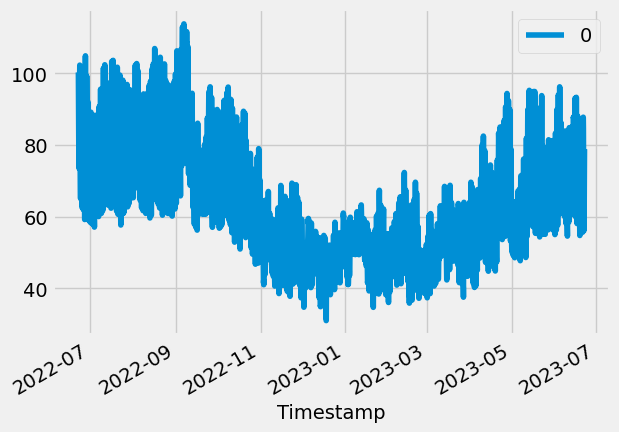

In [74]:
pd.DataFrame(pred, index=x_predict.index).plot()